PART A : Image Negative

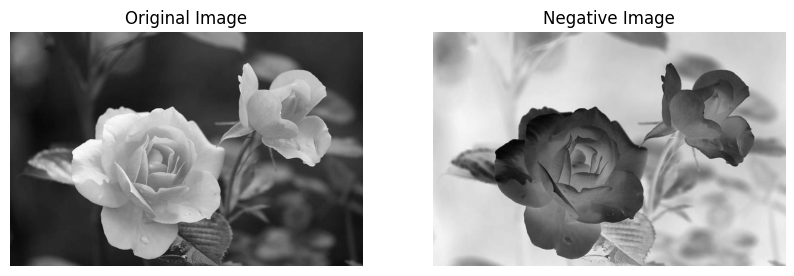

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/rose-grayscale.jpg',cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Image at path {image} could not be loaded. Please check the file path.")
# Compute the negative

image_negative = 255 - image

plt.figure(figsize=(10,5))
# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Negative Image
plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(image_negative, cmap='gray')
plt.axis('off')

plt.show()

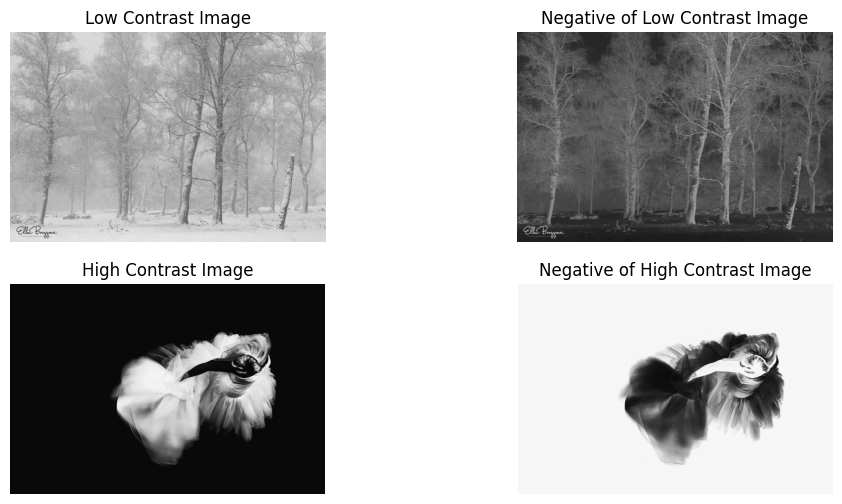

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


low_contrast_image = cv2.imread('/content/drive/MyDrive/Low_contrast_pic.jpg', cv2.IMREAD_GRAYSCALE)
high_contrast_image = cv2.imread('/content/drive/MyDrive/high_contrast_pic.jpg', cv2.IMREAD_GRAYSCALE)

if low_contrast_image is None or high_contrast_image is None:
    raise ValueError("Error loading one of the images. Please check the file paths.")

# Negative Operation
low_contrast_negative = 255 - low_contrast_image
high_contrast_negative = 255 - high_contrast_image


plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('Low Contrast Image')
plt.imshow(low_contrast_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Negative of Low Contrast Image')
plt.imshow(low_contrast_negative, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('High Contrast Image')
plt.imshow(high_contrast_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Negative of High Contrast Image')
plt.imshow(high_contrast_negative, cmap='gray')
plt.axis('off')

plt.show()


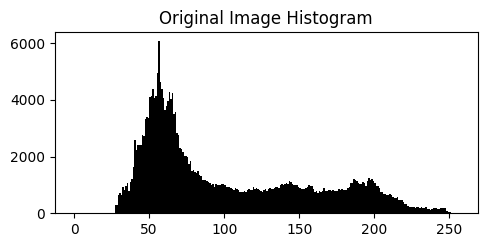

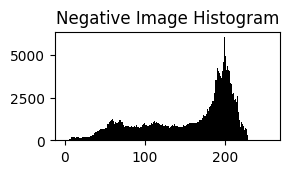

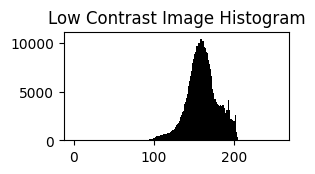

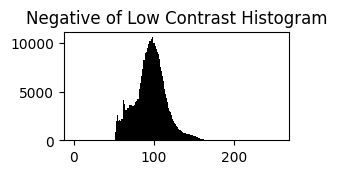

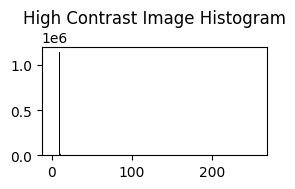

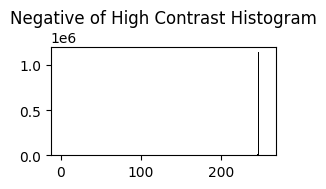

In [5]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(title)
    plt.show()

plt.figure(figsize=(12, 8))

# Original and Negative Image Histograms
plt.subplot(3, 2, 1)
plot_histogram(image, "Original Image Histogram")

plt.subplot(3, 2, 2)
plot_histogram(255 - image, "Negative Image Histogram")

# Low Contrast and Negative Histograms
plt.subplot(3, 2, 3)
plot_histogram(low_contrast_image, "Low Contrast Image Histogram")

plt.subplot(3, 2, 4)
plot_histogram(low_contrast_negative, "Negative of Low Contrast Histogram")

# High Contrast and Negative Histograms
plt.subplot(3, 2, 5)
plot_histogram(high_contrast_image, "High Contrast Image Histogram")

plt.subplot(3, 2, 6)
plot_histogram(high_contrast_negative, "Negative of High Contrast Histogram")


PART B : Log Transformation

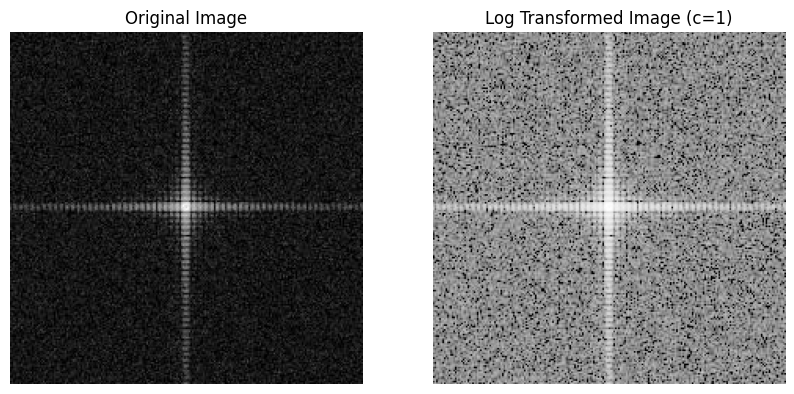

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a dark image with a narrow range of low gray-level values
image = cv2.imread('/content/drive/MyDrive/FTransform_img.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image could not be loaded. Please check the file path.")

# Log transformation function
def log_transform(image, c):
    # Convert image to float32 to handle the log operation properly
    image_float = np.float32(image)

    # Apply the log transformation
    log_image = c * np.log1p(image_float)  # np.log1p(x) computes log(1 + x)

    # Normalize the result to fit in the 8-bit range (0-255)
    cv2.normalize(log_image, log_image, 0, 255, cv2.NORM_MINMAX)

    # Convert the normalized image back to 8-bit
    log_image = np.uint8(log_image)

    return log_image

# Apply log transformation with a default value of c = 1
log_image = log_transform(image, c=1)

# Plot original and log-transformed images
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Log Transformed Image (c=1)')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.show()


Analyze the Effect on Dark Regions:
In this part, you should analyze how the log transformation enhances details in dark regions. Since log transformation increases the intensity of lower pixel values more than higher ones, it helps bring out details in darker regions of an image.

After applying the log transformation, you’ll notice that the previously dark areas are brightened, revealing details that were not easily visible in the original image.
The transformation compresses the higher pixel values while expanding the lower pixel values, making the dark areas more prominent.

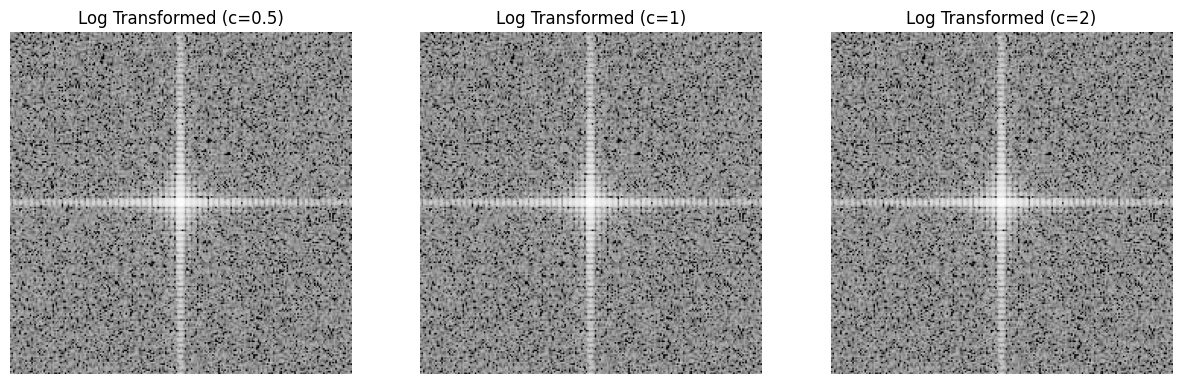

In [10]:
# Experiment with different values of c
c_values = [0.5, 1, 2]

plt.figure(figsize=(15, 5))

for i, c in enumerate(c_values):
    log_image = log_transform(image, c=c)

    plt.subplot(1, 3, i+1)
    plt.title(f'Log Transformed (c={c})')
    plt.imshow(log_image, cmap='gray')
    plt.axis('off')

plt.show()


PART C : Power Law Transformation

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def power_law_transform(image, gamma, c=1):
    image_float = np.float32(image)
    power_law_image = c * (image_float ** gamma)
    power_law_image = cv2.normalize(power_law_image, None, 0, 255, cv2.NORM_MINMAX)
    power_law_image = np.uint8(power_law_image)

    return power_law_image


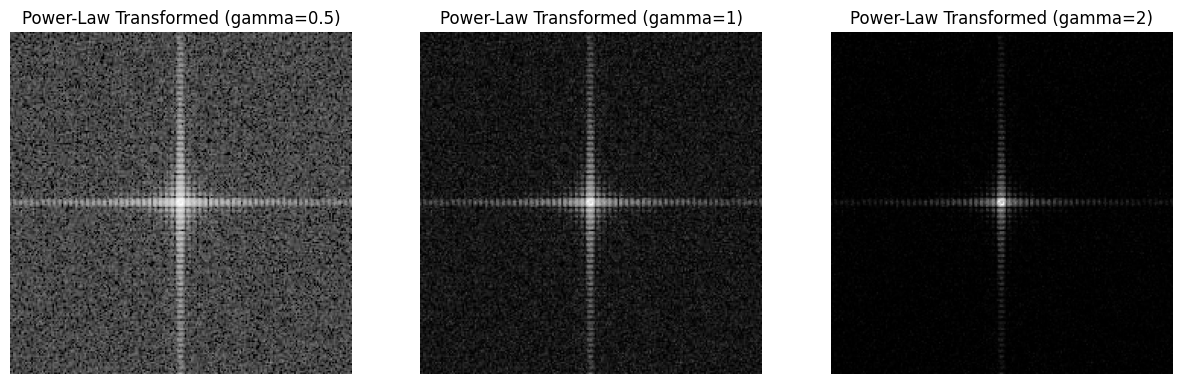

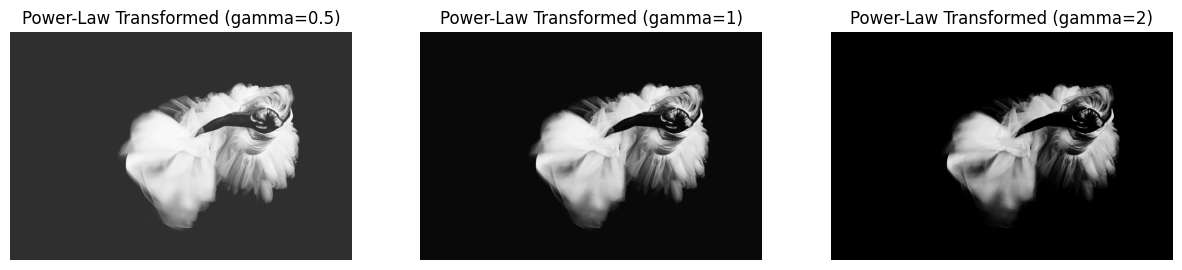

In [14]:
# Load the images (ensure they are grayscale)
dark_image = cv2.imread('/content/drive/MyDrive/FTransform_img.jpeg', cv2.IMREAD_GRAYSCALE)
high_contrast_image = cv2.imread('/content/drive/MyDrive/high_contrast_pic.jpg', cv2.IMREAD_GRAYSCALE)

if dark_image is None or high_contrast_image is None:
    raise ValueError("One or more images could not be loaded. Please check the file paths.")

# Define gamma values to experiment with
gamma_values = [0.5, 1, 2]

# Plot the results for the dark image
plt.figure(figsize=(15, 5))

for i, gamma in enumerate(gamma_values):
    transformed_image = power_law_transform(dark_image, gamma)

    plt.subplot(1, 3, i+1)
    plt.title(f'Power-Law Transformed (gamma={gamma})')
    plt.imshow(transformed_image, cmap='gray')
    plt.axis('off')

plt.show()
plt.figure(figsize=(15, 5))
for i, gamma in enumerate(gamma_values):
    transformed_image = power_law_transform(high_contrast_image, gamma)

    plt.subplot(1, 3, i+1)
    plt.title(f'Power-Law Transformed (gamma={gamma})')
    plt.imshow(transformed_image, cmap='gray')
    plt.axis('off')

plt.show()


Analyze the Effect of Gamma Values:


Gamma < 1: This enhances the darker regions of the image. The transformation will pull the darker pixels closer to white, brightening the image overall.
Gamma = 1: This gives you the original image back, as it does not change the pixel values.
Gamma > 1: This enhances the brighter regions of the image. The transformation will compress the darker pixels and expand the lighter ones, leading to a higher contrast image.

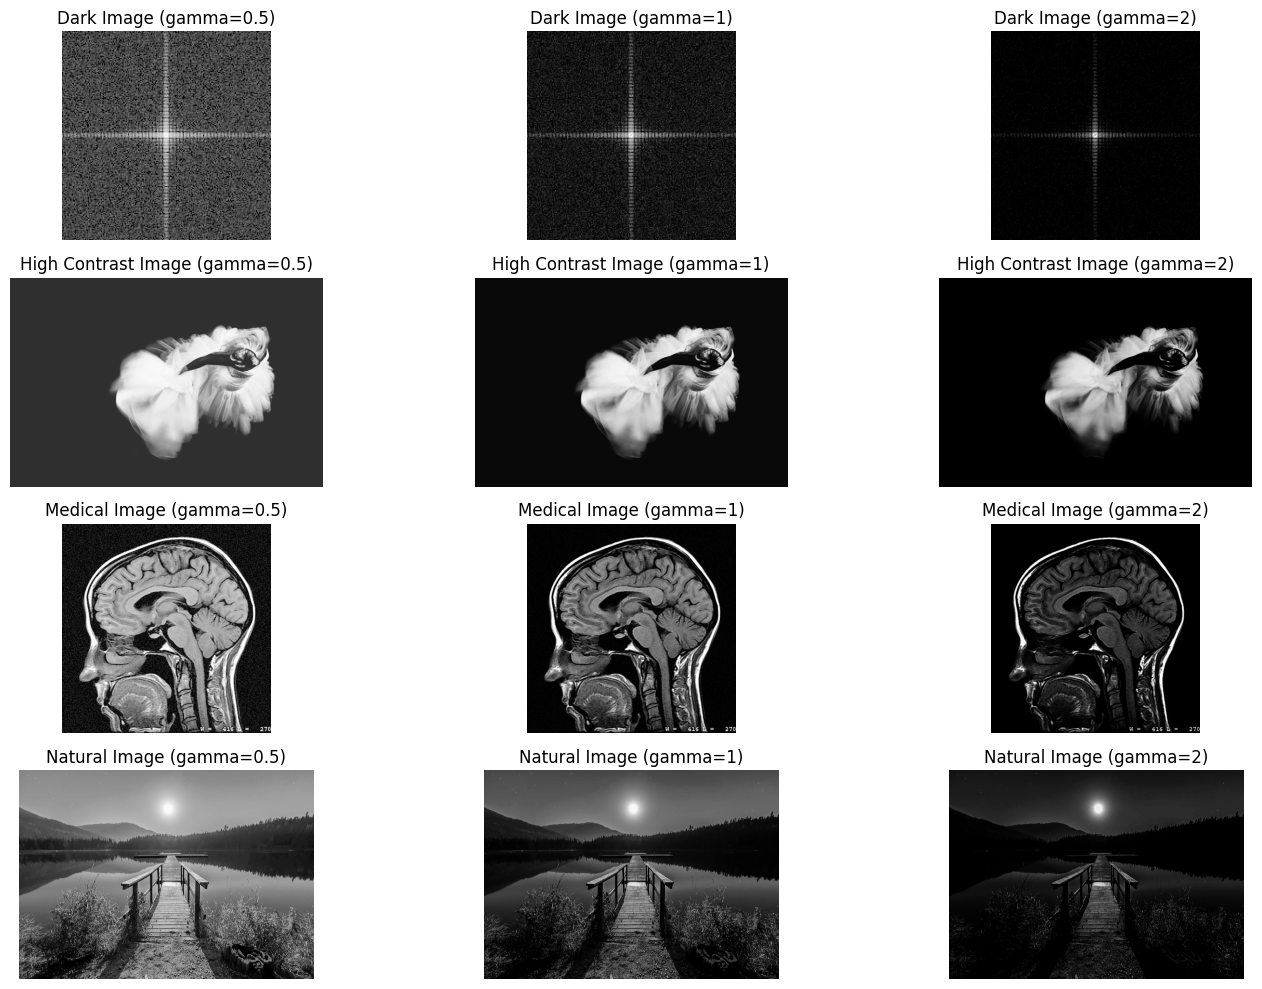

In [15]:

medical_image = cv2.imread('/content/drive/MyDrive/medical_image.png', cv2.IMREAD_GRAYSCALE)
natural_image = cv2.imread('/content/drive/MyDrive/natural_img.jpg', cv2.IMREAD_GRAYSCALE)

if medical_image is None or natural_image is None:
    raise ValueError("One or more images could not be loaded. Please check the file paths.")

images = [dark_image, high_contrast_image, medical_image, natural_image]
titles = ['Dark Image', 'High Contrast Image', 'Medical Image', 'Natural Image']

plt.figure(figsize=(15, 10))

for j, image in enumerate(images):
    for i, gamma in enumerate(gamma_values):
        transformed_image = power_law_transform(image, gamma)

        plt.subplot(len(images), len(gamma_values), j * len(gamma_values) + i + 1)
        plt.title(f'{titles[j]} (gamma={gamma})')
        plt.imshow(transformed_image, cmap='gray')
        plt.axis('off')

plt.tight_layout()
plt.show()


PART D : Spatial Filtering

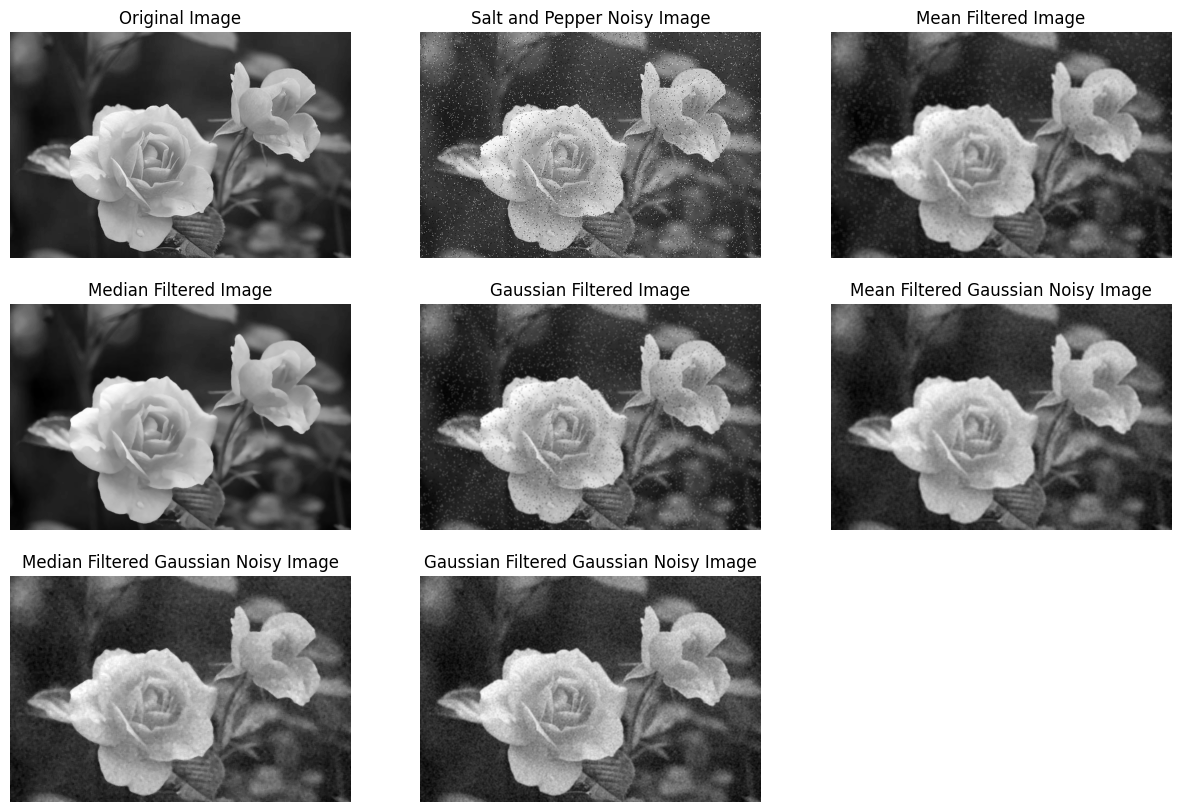

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob: float, pepper_prob: float):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = np.ceil(salt_prob * total_pixels)
    num_pepper = np.ceil(pepper_prob * total_pixels)

    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), gauss)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

image = cv2.imread('/content/drive/MyDrive/rose-grayscale.jpg', cv2.IMREAD_GRAYSCALE)

# Add noise to the image
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
gaussian_noisy_image = add_gaussian_noise(image)

# Apply filters
mean_filtered = cv2.blur(salt_and_pepper_noisy_image, (5, 5))
median_filtered = cv2.medianBlur(salt_and_pepper_noisy_image, 5)
gaussian_filtered = cv2.GaussianBlur(salt_and_pepper_noisy_image, (5, 5), 0)

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Salt and Pepper Noisy Image')
plt.imshow(salt_and_pepper_noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Mean Filtered Image')
plt.imshow(mean_filtered, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Median Filtered Image')
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Gaussian Filtered Image')
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

# Apply filters
mean_filtered_gaussian = cv2.blur(gaussian_noisy_image, (5, 5))
median_filtered_gaussian = cv2.medianBlur(gaussian_noisy_image, 5)
gaussian_filtered_gaussian = cv2.GaussianBlur(gaussian_noisy_image, (5, 5), 0)

plt.subplot(3, 3, 6)
plt.title('Mean Filtered Gaussian Noisy Image')
plt.imshow(mean_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Median Filtered Gaussian Noisy Image')
plt.imshow(median_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title('Gaussian Filtered Gaussian Noisy Image')
plt.imshow(gaussian_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.show()


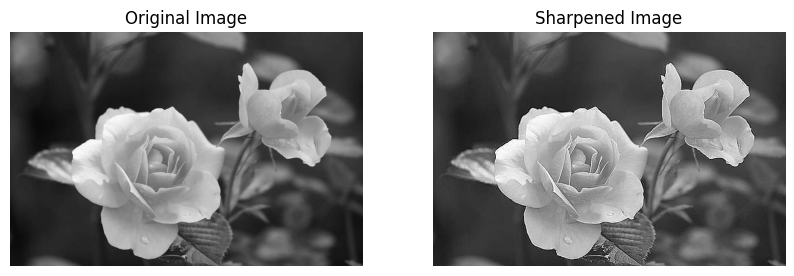

In [17]:

sharpening_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

# Apply the sharpening filter
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.show()


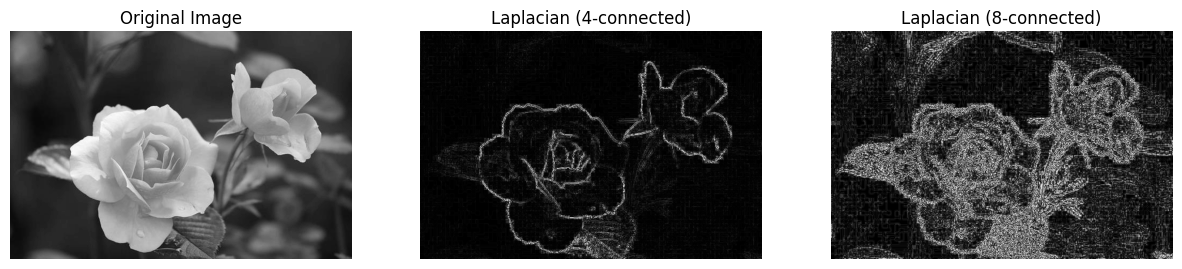

In [18]:
# Apply Laplacian operator (4-connected)
laplacian_4_connected = cv2.Laplacian(image, cv2.CV_64F, ksize=3, borderType=cv2.BORDER_DEFAULT)

# Apply Laplacian operator (8-connected)
laplacian_8_connected = cv2.Laplacian(image, cv2.CV_64F, ksize=5, borderType=cv2.BORDER_DEFAULT)

laplacian_4_connected = np.uint8(np.absolute(laplacian_4_connected))
laplacian_8_connected = np.uint8(np.absolute(laplacian_8_connected))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian (4-connected)')
plt.imshow(laplacian_4_connected, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Laplacian (8-connected)')
plt.imshow(laplacian_8_connected, cmap='gray')
plt.axis('off')

plt.show()


Part E : Image Enhancement: Arithmetic/Logic Operations